# Business objective 
<br>
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.<br><br>
The company is looking at prospective properties to buy to enter the market. The assignment is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.<br><br>
The aim is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# High level approach followed:

1.   Importing modules, Reading the data
2.   Analyzing Numerical Features in dataset
    *   Checking Statistical summary
    *   Outlier Treatment
    *   Checking Distribution of numerical features
    *   Inspecting Correlation
    *   Missing Value Handling
    *   Univaritate and Bivariate Analysis, Data Visualization
    *   Extracting new features and drop redundant ones
    *   Correcting datatype
     
3.  Analyzing Categorical Features in dataset
    *   Missing Value Handling
    *   Identifying Ordered and Unordered variables
    *   Data Visualization of Ordered variables and encoding them
    *   Data Visualization of Ordered variables and encoding them
    *   Dropping Redundant Features created out as part of Dummy variable creation
4.  Splitting data into Train and Test data
    *   Transformation of Target Variable
    *   Imputing Missing Values
    *   Feature Scaling
5.  Primary Feature Selection using RFE
6.  Ridge Regression
7.  Lasso Regression
8.  Ridge vs Lasso : Comparing model coefficients
9.  Model Evaluation 
10. Choosing the final model and most significant features.

# Import modules

In [908]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

<br><br>
# Reading dataset

In [909]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [910]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [911]:
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

<br><br>
### Separating the Numerical and Categorical features for analysis

In [912]:
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

In [913]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<br><br>
## Analyzing Numerical Data

### Outlier Detection

Checking percentage of outliers for all the numerical columns.

In [914]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

Features  Percentage
30  EnclosedPorch       14.25
10     BsmtFinSF2       11.44
5     OverallCond        8.56
32    ScreenPorch        7.95
1      MSSubClass        7.05
8      MasVnrArea        6.58
2     LotFrontage        6.03
18   BsmtHalfBath        5.62
29    OpenPorchSF        5.27
3         LotArea        4.73
22   KitchenAbvGr        4.66
12    TotalBsmtSF        4.18
37      SalePrice        4.18
34        MiscVal        3.56
21   BedroomAbvGr        2.40
28     WoodDeckSF        2.19
16      GrLivArea        2.12
23   TotRmsAbvGrd        2.05
11      BsmtUnfSF        1.99
15   LowQualFinSF        1.78
31      3SsnPorch        1.64
27     GarageArea        1.44
13       1stFlrSF        1.37
9      BsmtFinSF1        0.48
33       PoolArea        0.48
6       YearBuilt        0.48
24     Fireplaces        0.34
26     GarageCars        0.34
14       2ndFlrSF        0.14
4     OverallQual        0.14
17   BsmtFullBath        0.07
35         MoSold        0.00
36         YrSold        0.00
0              Id        0.00
25    GarageYrBlt        0.00
20       HalfBath        0.00
7    YearRemodAdd        0.00
19       FullBath        0.00

**Comment:**
- Majority of the numeric features  have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of **[25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]**
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in this

In [915]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25) 
        max_value = housing_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature] > max_value] = max_value
        housing_df[feature][housing_df[feature] < min_value ] = min_value

In [916]:
# Checking the dataset after reassigning minmum and maximum values

housing_df.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000   1460.000000  1460.000000   
mean    730.500000    55.085616    69.134888   9647.388014     6.100685   
std     421.610009    37.508183    19.662022   3594.356399     1.378430   
min       1.000000    20.000000    27.500000   1481.500000     2.000000   
25%     365.750000    20.000000    59.000000   7553.500000     5.000000   
50%     730.500000    50.000000    69.000000   9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000  11601.500000     7.000000   
max    1460.000000   145.000000   111.500000  17673.500000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.543493  1971.299315   1984.865753    90.192149   439.997517  ...   
std       0.963696    30.108397     20.645407   134.925253   433.219435  ...   
min       3.500000  1885.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       7.500000  2010.000000   2010.000000   415.000000  1780.625000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000         1460.0     1460.0       1460.0   
mean     91.806849    42.603425            0.0        0.0          0.0   
std     116.658120    52.501584            0.0        0.0          0.0   
min       0.000000     0.000000            0.0        0.0          0.0   
25%       0.000000     0.000000            0.0        0.0          0.0   
50%       0.000000    25.000000            0.0        0.0          0.0   
75%     168.000000    68.000000            0.0        0.0          0.0   
max     420.000000   170.000000            0.0        0.0          0.0   

       PoolArea  MiscVal       MoSold       YrSold      SalePrice  
count    1460.0   1460.0  1460.000000  1460.000000    1460.000000  
mean        0.0      0.0     6.321918  2007.815753  180921.195890  
std         0.0      0.0     2.703626     1.328095   79442.502883  
min         0.0      0.0     1.000000  2006.000000   34900.000000  
25%         0.0      0.0     5.000000  2007.000000  129975.000000  
50%         0.0      0.0     6.000000  2008.000000  163000.000000  
75%         0.0      0.0     8.000000  2009.000000  214000.000000  
max         0.0      0.0    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

<br><br><br>
## Inspecting Correlation in Numeric Data

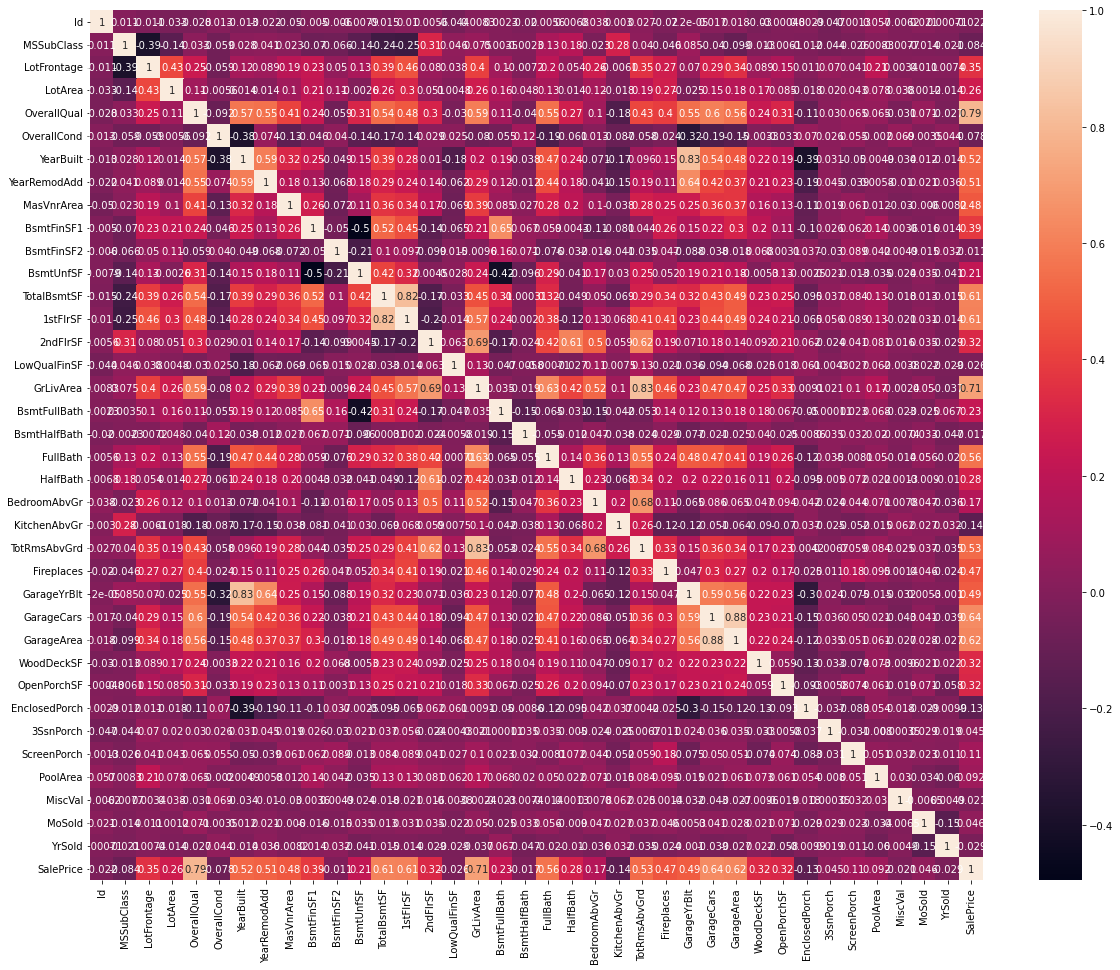

In [917]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

**Commentary from inspecting the correlation**
- Few features have high correlation with each other
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair will be dropped after data visualization.

<br><br>
## Univariate and Bivariate Analysis - Numerical Features

### Analyzing Numerical Features with continuous values

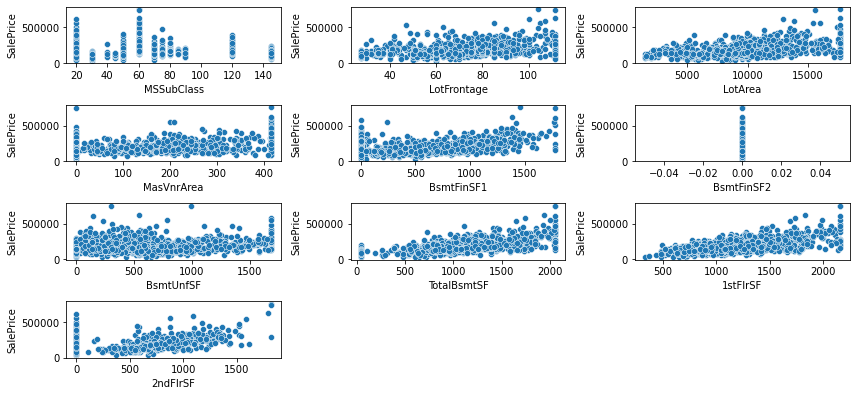

In [918]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

**Comment:**

- Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.
- 'MSSubClass' has discrete values
- 'BsmtSF2' has single value and can be dropped.

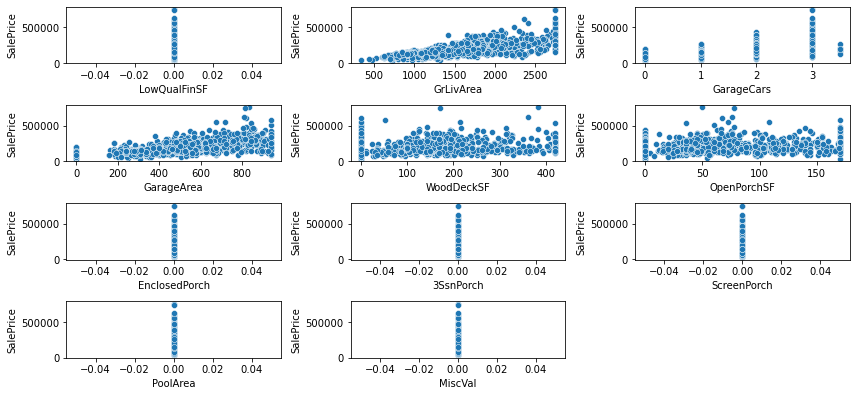

In [919]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

**Comment**
- 'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice.
- 'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.

##### Visualizing the distribution of the numeric features

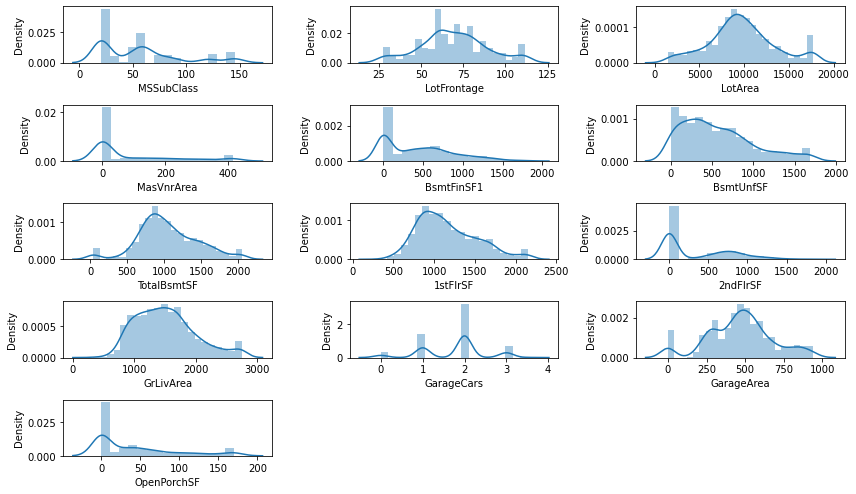

In [920]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing_df[feature])
    plt.tight_layout()

In [921]:
housing_df[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

LowQualFinSF    GrLivArea   GarageCars   GarageArea   WoodDeckSF  \
count        1460.0  1460.000000  1460.000000  1460.000000  1460.000000   
mean            0.0  1503.735873     1.765411   470.670719    91.806849   
std             0.0   481.375641     0.742753   207.105729   116.658120   
min             0.0   334.000000     0.000000     0.000000     0.000000   
25%             0.0  1129.500000     1.000000   334.500000     0.000000   
50%             0.0  1464.000000     2.000000   480.000000     0.000000   
75%             0.0  1776.750000     2.000000   576.000000   168.000000   
max             0.0  2747.625000     3.500000   938.250000   420.000000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  
count  1460.000000         1460.0     1460.0       1460.0    1460.0   1460.0  
mean     42.603425            0.0        0.0          0.0       0.0      0.0  
std      52.501584            0.0        0.0          0.0       0.0      0.0  
min       0.000000            0.0        0.0          0.0       0.0      0.0  
25%       0.000000            0.0        0.0          0.0       0.0      0.0  
50%      25.000000            0.0        0.0          0.0       0.0      0.0  
75%      68.000000            0.0        0.0          0.0       0.0      0.0  
max     170.000000            0.0        0.0          0.0       0.0      0.0

Removing these features having fixed values as they won't contribute in predicting SalePrice

In [922]:
housing_df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

LowQualFinSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal
count        1460.0         1460.0     1460.0       1460.0    1460.0   1460.0
mean            0.0            0.0        0.0          0.0       0.0      0.0
std             0.0            0.0        0.0          0.0       0.0      0.0
min             0.0            0.0        0.0          0.0       0.0      0.0
25%             0.0            0.0        0.0          0.0       0.0      0.0
50%             0.0            0.0        0.0          0.0       0.0      0.0
75%             0.0            0.0        0.0          0.0       0.0      0.0
max             0.0            0.0        0.0          0.0       0.0      0.0

In [923]:
housing_df.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

<br><br><br>
### Analyzing Numerical Features with Discrete Values

In [924]:
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

OverallQual  OverallCond  MoSold  YrSold  BsmtFullBath  BsmtHalfBath  \
0               7          5.0       2    2008           1.0             0   
1               6          7.5       5    2007           0.0             0   
2               7          5.0       9    2008           1.0             0   
3               7          5.0       2    2006           1.0             0   
4               8          5.0      12    2008           1.0             0   
5               5          5.0      10    2009           1.0             0   
6               8          5.0       8    2007           1.0             0   
7               7          6.0      11    2009           1.0             0   
8               7          5.0       4    2008           0.0             0   
9               5          6.0       1    2008           1.0             0   
10              5          5.0       2    2008           1.0             0   
11              9          5.0       7    2006           1.0             0   
12              5          6.0       9    2008           1.0             0   
13              7          5.0       8    2007           0.0             0   
14              6          5.0       5    2008           1.0             0   
15              7          7.5       7    2007           0.0             0   
16              6          7.0       3    2010           1.0             0   
17              4          5.0      10    2006           0.0             0   
18              5          5.0       6    2008           1.0             0   
19              5          6.0       5    2009           0.0             0   
20              8          5.0      11    2006           0.0             0   
21              7          7.0       6    2007           0.0             0   
22              8          5.0       9    2008           0.0             0   
23              5          7.0       6    2007           1.0             0   
24              5          7.5       5    2010           1.0             0   
25              8          5.0       7    2009           0.0             0   
26              5          7.0       5    2010           0.0             0   
27              8          5.0       5    2010           1.0             0   
28              5          6.0      12    2006           1.0             0   
29              4          6.0       5    2008           0.0             0   
30              4          4.0       7    2008           0.0             0   
31              5          6.0       6    2008           0.0             0   
32              8          5.0       1    2008           0.0             0   
33              5          5.0       4    2010           0.0             0   
34              9          5.0       8    2007           1.0             0   
35              8          5.0       9    2006           0.0             0   
36              5          5.0       6    2009           0.0             0   
37              5          6.0      10    2009           0.0             0   
38              5          7.0       1    2010           1.0             0   
39              4          5.0       6    2008           0.0             0   
40              6          5.0      12    2006           0.0             0   
41              5          6.0       7    2007           0.0             0   
42              5          7.0      12    2007           1.0             0   
43              5          6.0       7    2008           1.0             0   
44              5          6.0       5    2006           1.0             0   
45              9          5.0       2    2010           1.0             0   
46              7          5.0       8    2009           1.0             0   
47              8          5.0       7    2007           0.0             0   
48              4          5.0       6    2009           0.0             0   
49              5          7.0       1    2007           1.0             0   
50              6          6

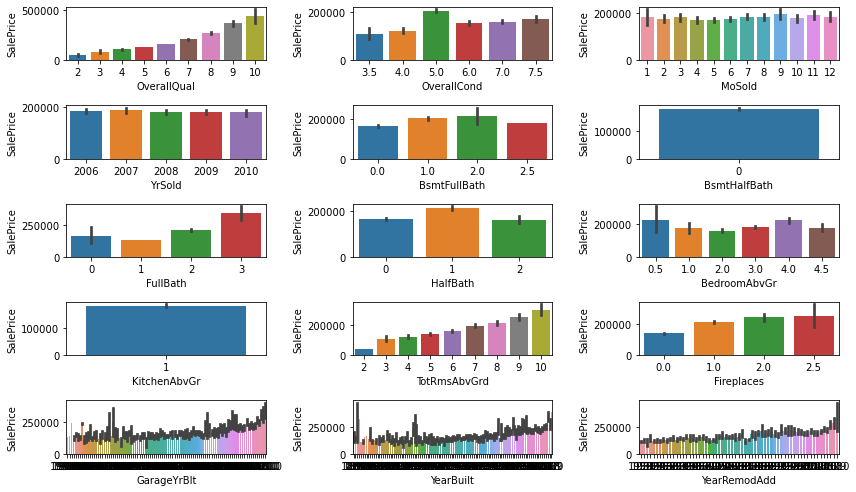

In [925]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

**Comment:**
Following are the observations from the plots.
- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

- 'OverallCond' : SalePrice is highest for rating 5

- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

- 'FullBath' = 2 and 'HalfBath' = 1 have highest SalePrice 

- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

- 'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : Will extract new features from to identify any trend

- 'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight

In [926]:
housing_df[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

BsmtFullBath  KitchenAbvGr  GarageYrBlt    YearBuilt  YearRemodAdd
count   1460.000000        1460.0  1379.000000  1460.000000   1460.000000
mean       0.425000           1.0  1978.506164  1971.299315   1984.865753
std        0.517373           0.0    24.689725    30.108397     20.645407
min        0.000000           1.0  1900.000000  1885.000000   1950.000000
25%        0.000000           1.0  1961.000000  1954.000000   1967.000000
50%        0.000000           1.0  1980.000000  1973.000000   1994.000000
75%        1.000000           1.0  2002.000000  2000.000000   2004.000000
max        2.500000           1.0  2010.000000  2010.000000   2010.000000

In [927]:
print(housing_df['BsmtFullBath'].value_counts())
print(housing_df['KitchenAbvGr'].value_counts())

0.0    856
1.0    588
2.0     15
2.5      1
Name: BsmtFullBath, dtype: int64
1    1460
Name: KitchenAbvGr, dtype: int64


In [928]:
# dropping KitchenAbvGr for not having useful information
housing_df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [929]:
housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

GarageYrBlt    YearBuilt  YearRemodAdd       YrSold
count  1379.000000  1460.000000   1460.000000  1460.000000
mean   1978.506164  1971.299315   1984.865753  2007.815753
std      24.689725    30.108397     20.645407     1.328095
min    1900.000000  1885.000000   1950.000000  2006.000000
25%    1961.000000  1954.000000   1967.000000  2007.000000
50%    1980.000000  1973.000000   1994.000000  2008.000000
75%    2002.000000  2000.000000   2004.000000  2009.000000
max    2010.000000  2010.000000   2010.000000  2010.000000

In [930]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2021 - housing_df[feature]

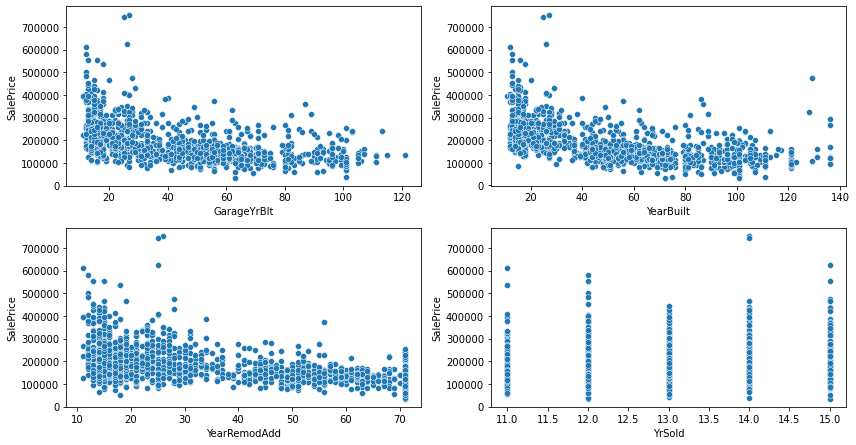

In [931]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

**Comment:**
- For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages
- SalePrice is more lower value of YearBuilt i.e. more recently build houses
- Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice 
- YrSold still does not show any significant trend

### Missing Value Handling - Numerical Features

In [932]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.select_dtypes(exclude=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ' : ',  round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [933]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]
housing_df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

In [934]:
# Checking the number of remaining columns
housing_df.columns.shape

(73,)

**Comment:**

- GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
- GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
- TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
- TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
- Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [935]:
housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(housing_df.columns.shape)

(69,)


<br><br><br>
## Analyzing Categorical Features

In [936]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<br><br>
### Missing Value Handling - Categorical Features

In [937]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.select_dtypes(include=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [938]:
housing_df['Electrical'].isnull().sum()

1

In [939]:
housing_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

**Comment:**
- For 'Alley', Nan means 'No access to alley'
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
- MiscFeature - Nan means no additional features mentioned.

All these features will be imputed with meaningful values in place of missing data.

In [940]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing_df[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


##### Imputing missing values with "Not_applicable"

In [941]:

housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing_df[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [942]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
housing_df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
housing_df.dropna(subset=['Electrical'], inplace=True)

In [943]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0


Missing value imputation will be done after splitting the data into train and test set to avoid data leakage.

In [944]:
housing_df.columns.shape

(68,)

**Encoding For Categorical Variables**
**Ordered Features -- to be label encoded**
'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',
'GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded**
'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [945]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(housing_df['SalePrice'], housing_df[feature])
        plt.tight_layout()

Dividing the ordinal features into smaller segments and visualizing their impact on SalePrice.

<br><br><br>
### Analyzing Ordered Features

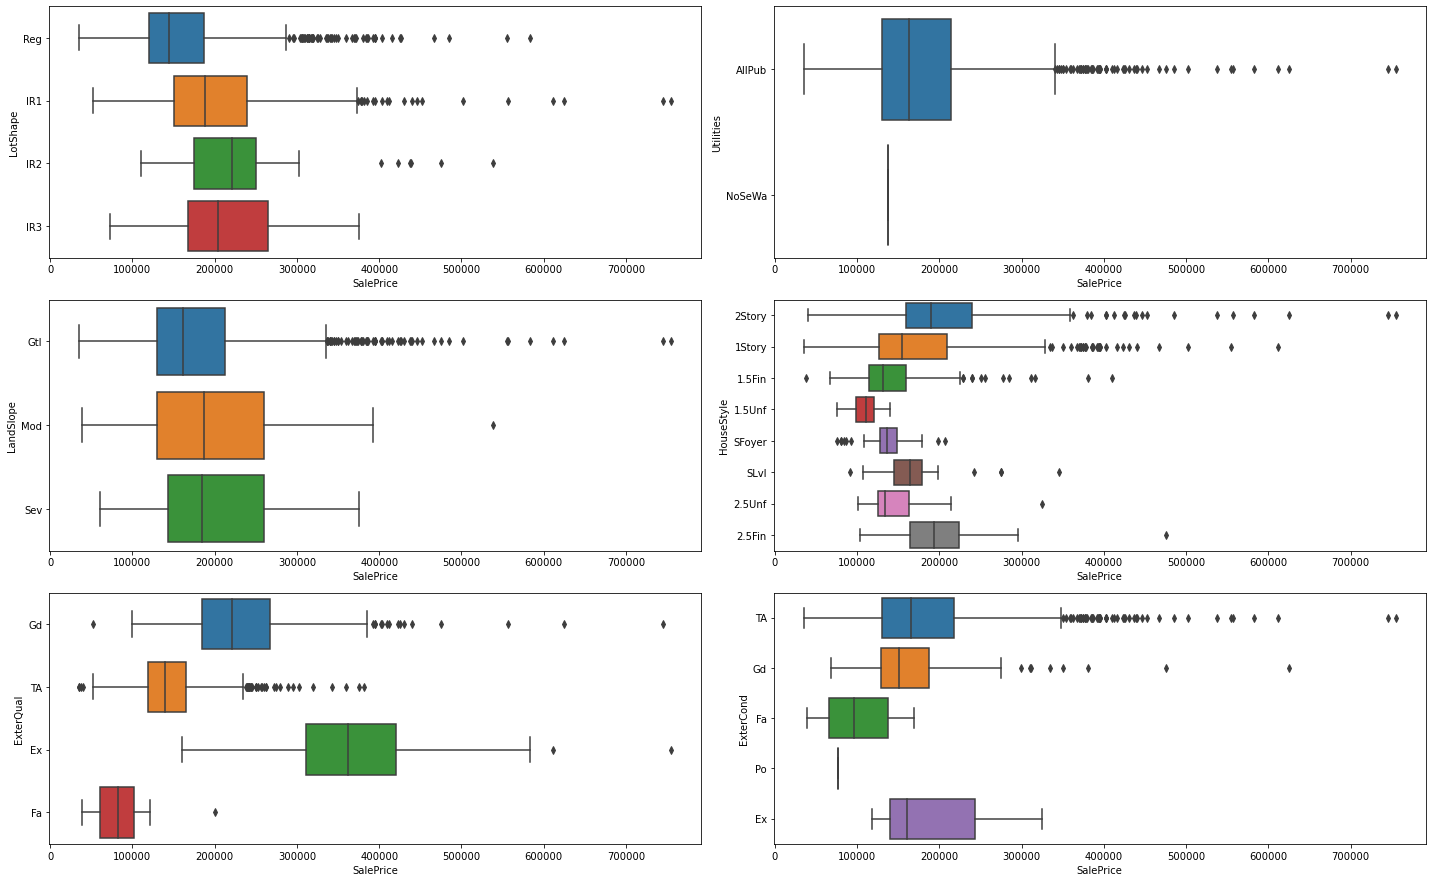

In [946]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

generate_boxplot(ext_features)

**Comment:**
- 'LotShape' : Slightly irregular LotShape have the highest SalePrice
- 'Utilities' : Most of the houses in the dataset have all the public utilities
- 'LandSlope' : Houses at severe land slope have lowest SalePrice
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

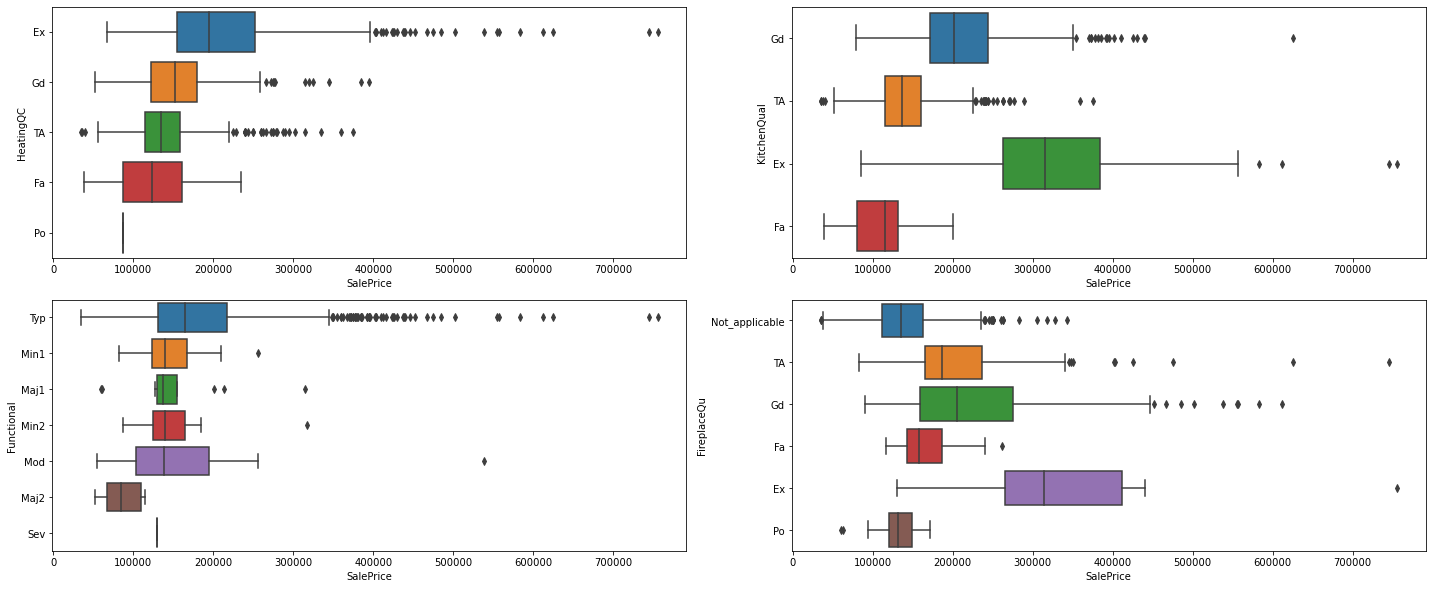

In [947]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

**Comment:**

- Houses having excellent heating quality and kitchen quality have the highest SalePrice
- Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
- SalePrice range in largest for houses with average fireplace quality.

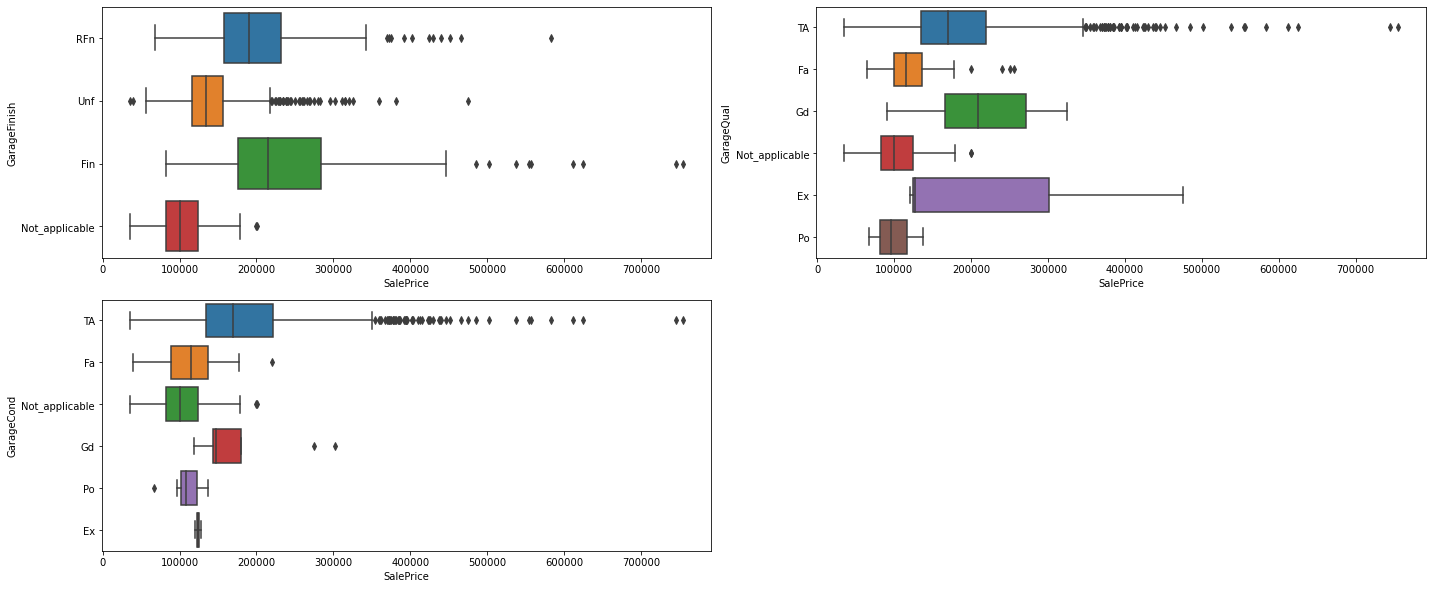

In [948]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(garage_features)

**Comment:**

- SalePrice is highest where garage is finished.
- The range of SalePrice is widest for Typical/Average Garage quality and condition.
- There are very few houses with excellect condition of garage.

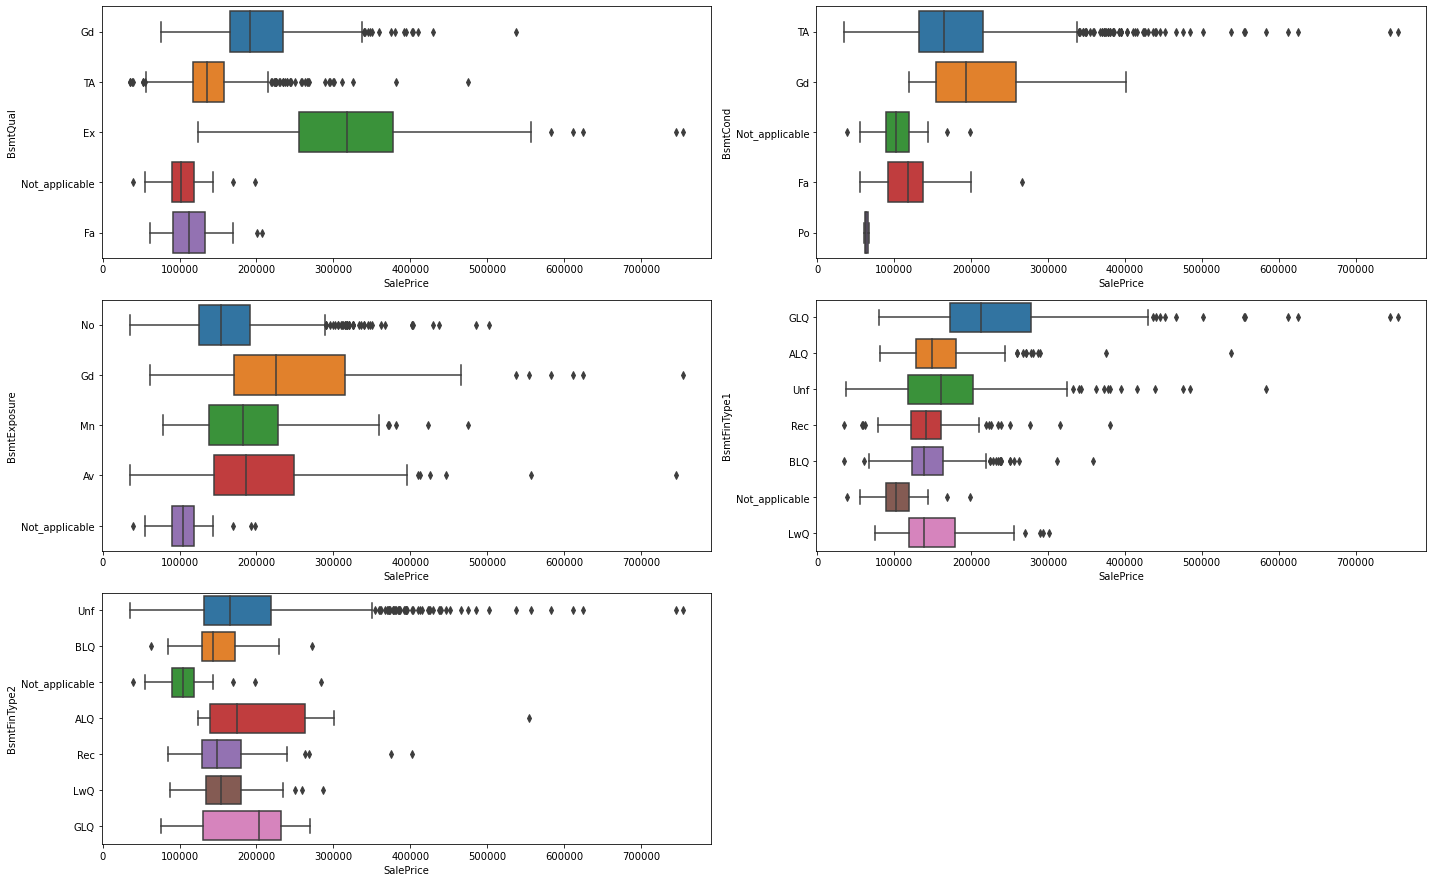

In [949]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

**Comment:**

- Houses with excellent quality basement have the highest SalePrice
- Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
- A lot of houses have unfinished basment or no basement (label = Not_applicable)

### Encoding Categorical (Ordered) Features 

In [950]:

housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [951]:
# Checking the features after encoding

housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 255.4 KB


<br><br><br>
### Analyzing Unordered Featues

In [952]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

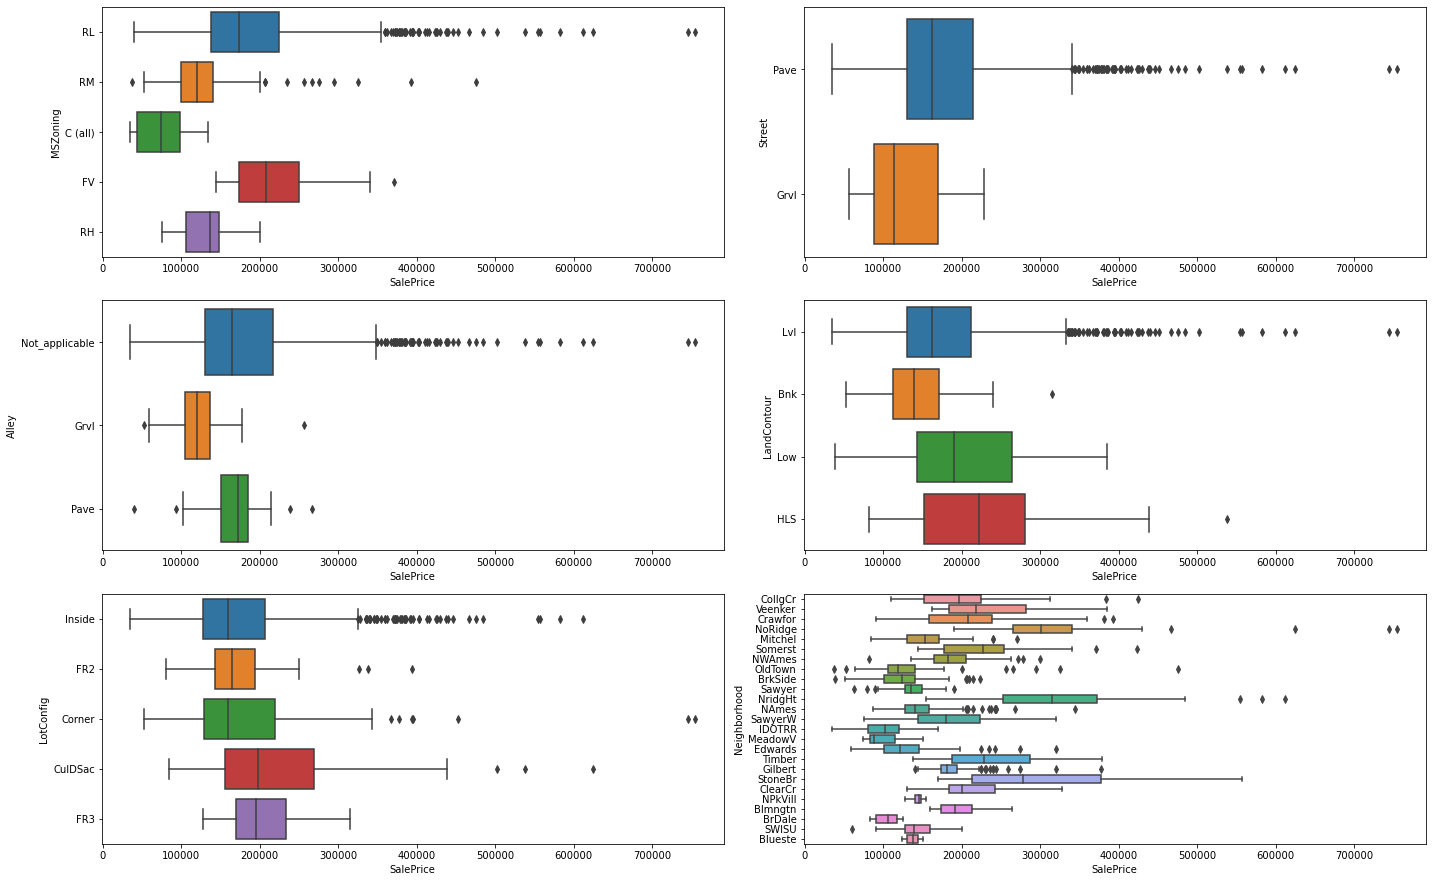

In [953]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

**Comment:**

- Most of the houses do not have alley
- Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

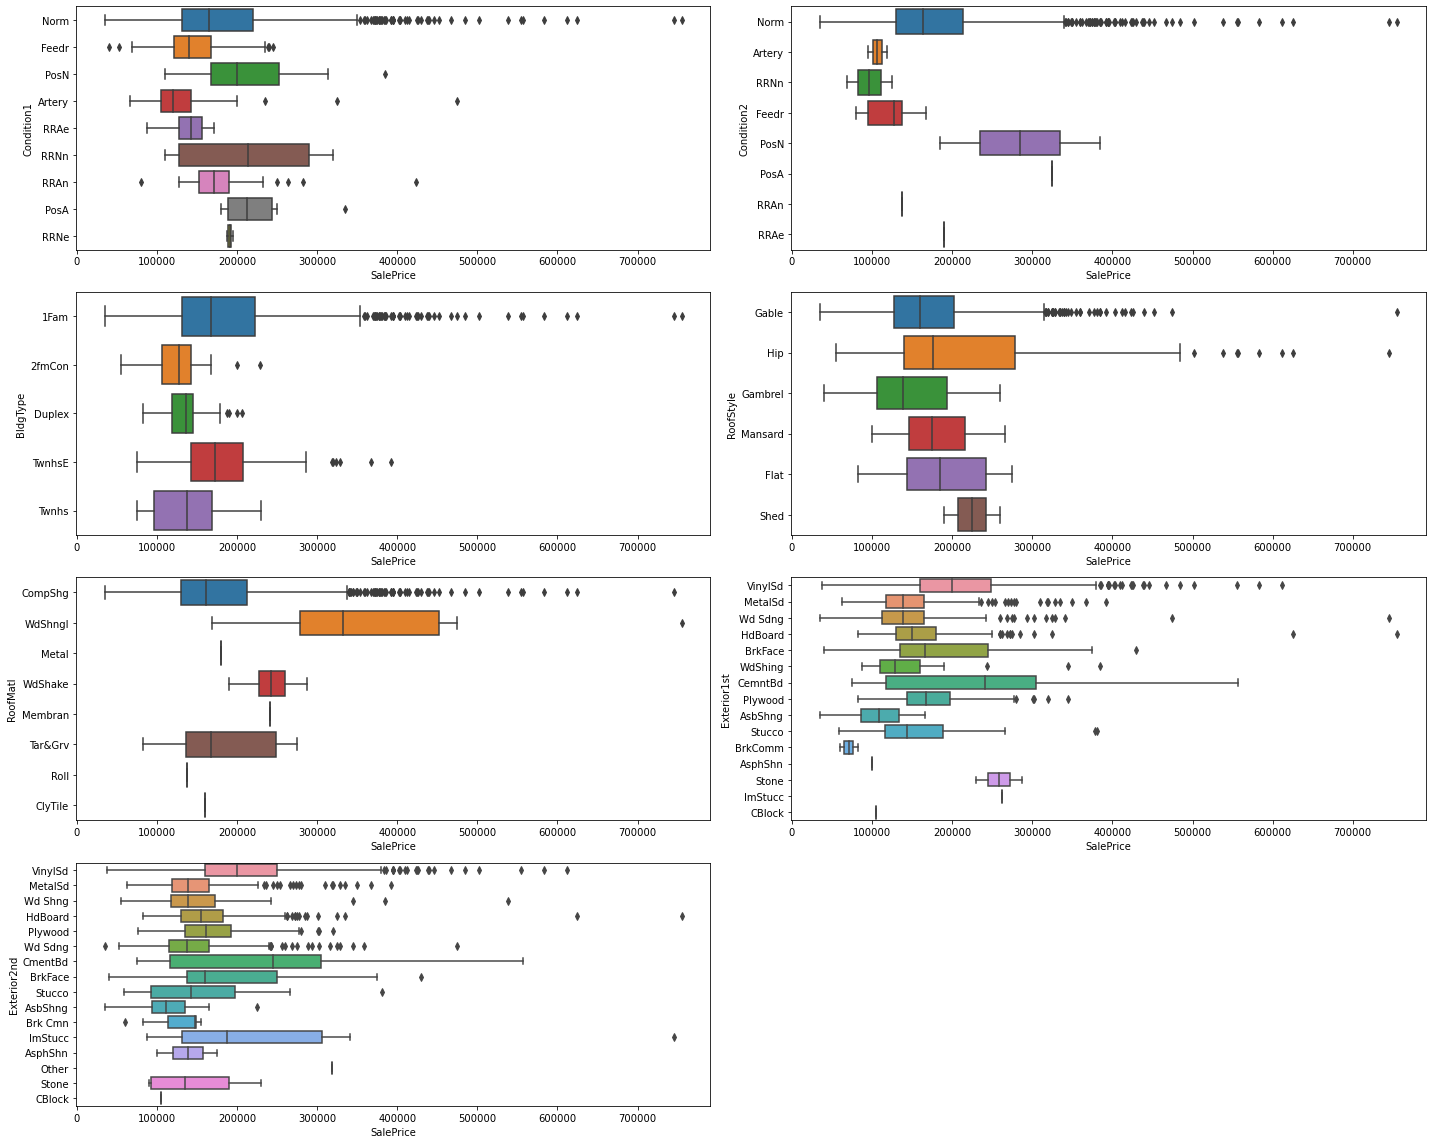

In [954]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

**Comment:**
- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
- Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.



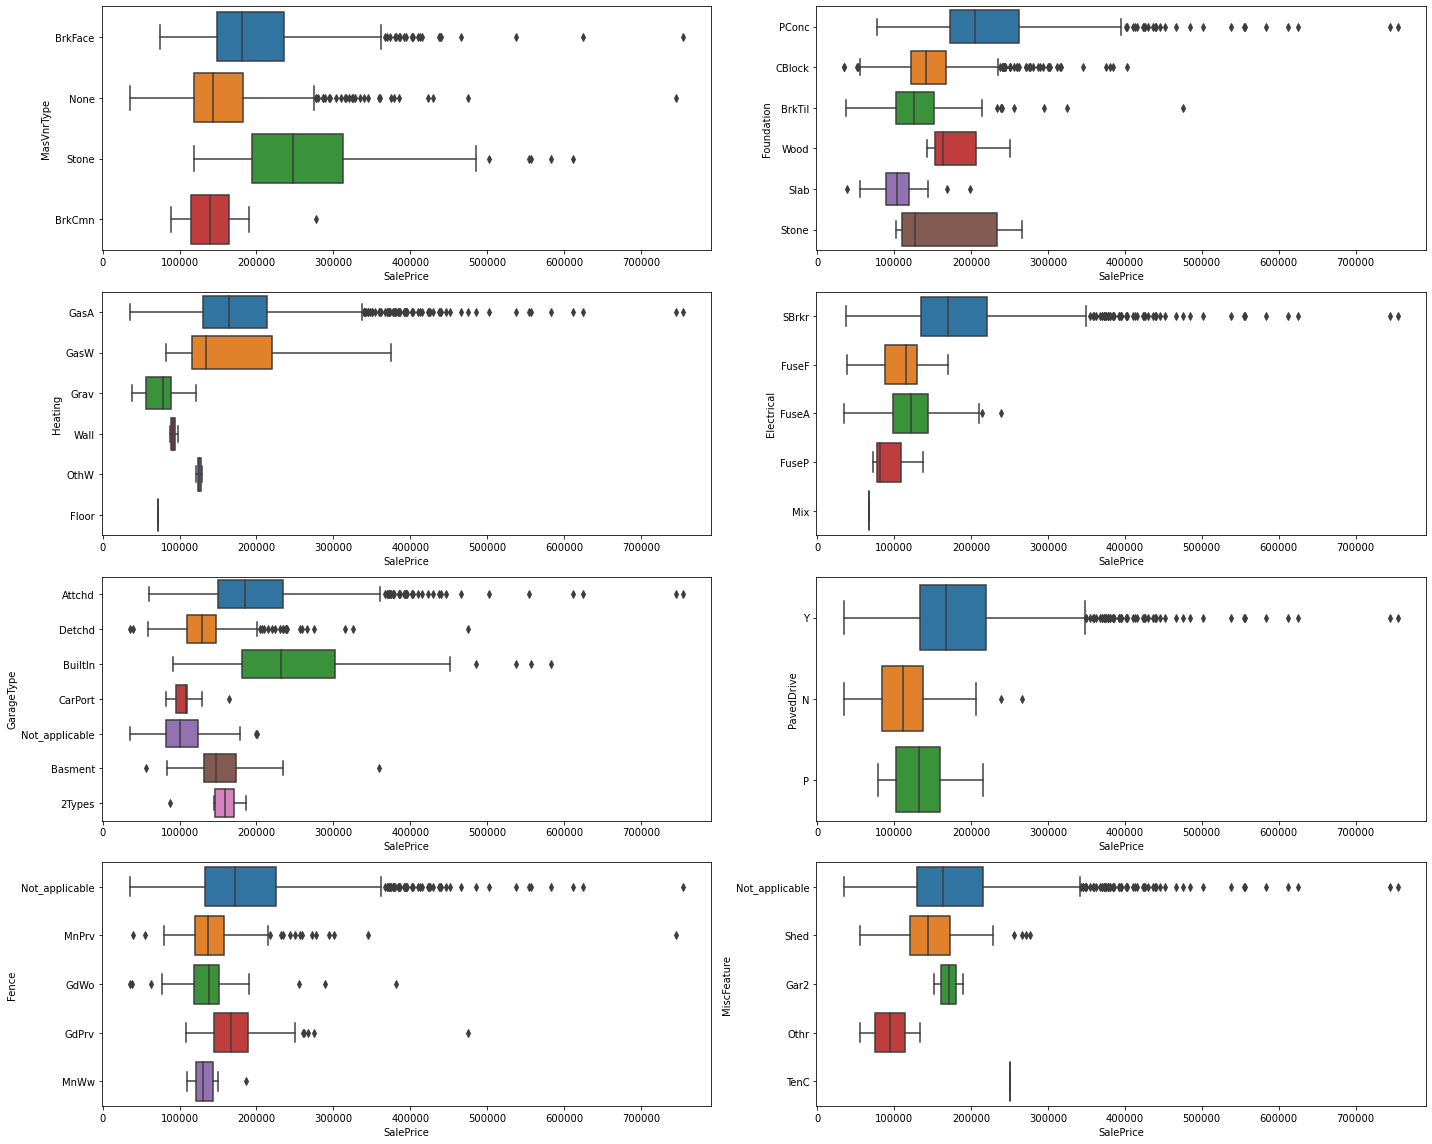

In [955]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

**Comment:**

- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

- Houses with attached and built-in garage have high SalePrice
- Most of the houses do not have fence (Fence= Not_applicable)

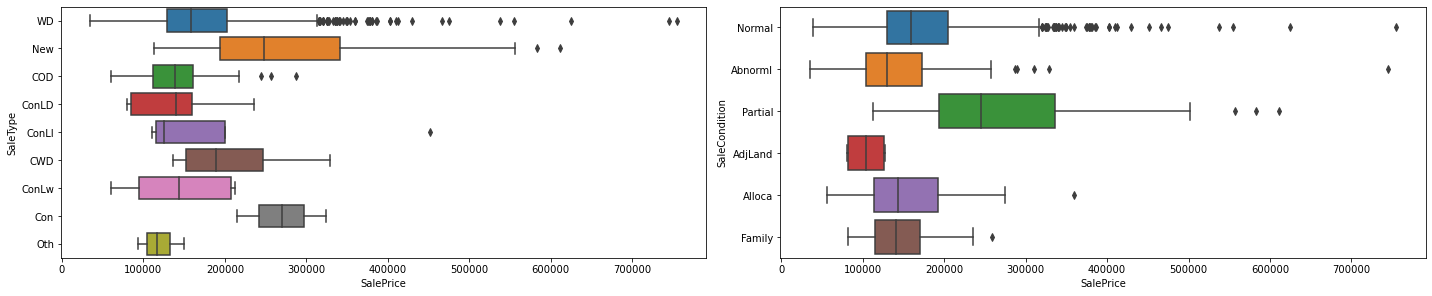

In [956]:
generate_boxplot(['SaleType','SaleCondition'])

**Comment:**

- Most of the houses are newly built, houses with warranty deed have high SalePrice
- Sale condition = Normal leads to high SalePrice

<br><br><br>
### Encoding Categorical (Unordered) Variables

In [957]:
dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True)

In [958]:
dummy_df.shape

(1451, 144)

**Comment:**

- Adding 144 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [959]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [960]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 52)


In [961]:
housing_df.shape

(1451, 68)

In [962]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features,axis=1)

In [963]:
housing_df.shape

(1451, 97)

<br><br><br>
## Splitting into Train and Test Data

In [964]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0          60         65.0   8450.0         3          3          0   
1          20         80.0   9600.0         3          3          0   
2          60         68.0  11250.0         0          3          0   
3          70         60.0   9550.0         0          3          0   
4          60         84.0  14260.0         0          3          0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0           3            7          5.0         18  ...                  0   
1           0            6          7.5         45  ...                  0   
2           3            7          5.0         20  ...                  0   
3           3            7          5.0        106  ...                  1   
4           3            8          5.0         21  ...                  0   

   GarageType_Not_applicable  PavedDrive_Y  Fence_MnPrv  Fence_Not_applicable  \
0                          0             1            0                     1   
1                          0             1            0                     1   
2                          0             1            0                     1   
3                          0             1            0                     1   
4                          0             1            0                     1   

   MiscFeature_Not_applicable  SaleType_New  SaleType_WD  \
0                           1             0            1   
1                           1             0            1   
2                           1             0            1   
3                           1             0            1   
4                           1             0            1   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 96 columns]

<br><br><br>
### Checking the distribution of target variable - SalePrice

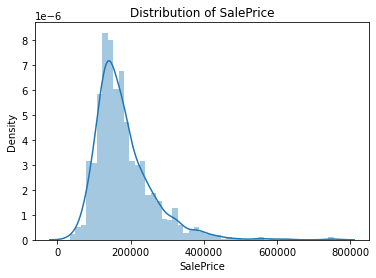

In [965]:
plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

**Comment:** Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

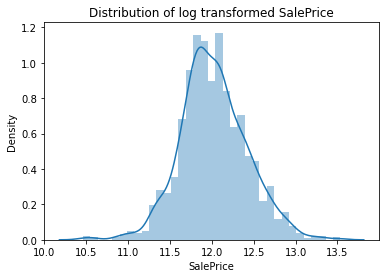

In [966]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [967]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing_df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [968]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [969]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 96)
(291, 96)
(1160,)
(291,)


In [970]:
X['LotFrontage'].isnull().any()

True

In [971]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [972]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [973]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

<br><br><br>
### Feature Scaling

In [974]:
X_train.values

array([[5.0000e+01, 5.4000e+01, 6.3420e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.4500e+02, 2.7500e+01, 2.5220e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 7.0000e+01, 7.9310e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+01, 5.0000e+01, 9.0000e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 4.8000e+01, 1.0635e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 6.7000e+01, 1.0656e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [975]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [976]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [977]:
# Checking the features after 

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.137941    -0.840191 -0.892882  0.747271   0.029374  -0.225421   
1       2.389253    -2.335542 -1.956426  0.747271   0.029374  -0.225421   
2      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
3      -0.936002     0.000000 -0.396469 -1.386037   0.029374  -0.225421   
4      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
5      -0.137941     0.000000 -0.921280  0.747271   0.029374  -0.225421   
6      -0.936002    -0.558050  0.290659 -1.386037   0.029374  -0.225421   
7      -0.936002    -0.501621  0.014193  0.747271   0.029374  -0.225421   
8      -0.936002     0.000000  2.261973 -0.674935   0.029374  -0.225421   
9      -0.936002     0.344804  1.394851  0.747271   0.029374  -0.225421   
10     -0.936002    -1.065905 -0.040098  0.747271   0.029374  -0.225421   
11      0.128080     0.006234 -0.545420  0.747271   0.029374  -0.225421   
12      0.527110    -0.50

<br><br><br>
## Initial Feature Selection with RFE

In [978]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def get_top_n_features_from_dataset(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [979]:
# Checking top 40, 50 and 60 features
top_40 = get_top_n_features_from_dataset(40)
top_50 = get_top_n_features_from_dataset(50)
top_60 = get_top_n_features_from_dataset(60)

Top 40 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'Street_Pave', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'Garag

<br><br><br>
#### Given the training data and list of features, this will provide the statistical summary of the model.<br>This will be used to check adjusted R-square value for top 40, 50 and 60 features

In [980]:
def build_statsmodel(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())    

In [981]:
build_statsmodel(X_tr_scaled,y_train,top_40)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     298.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:29:20   Log-Likelihood:                 867.18
No. Observations:                1160   AIC:                            -1652.
Df Residuals:                    1119   BIC:                            -1445.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [982]:
build_statsmodel(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     244.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:29:20   Log-Likelihood:                 883.38
No. Observations:                1160   AIC:                            -1665.
Df Residuals:                    1109   BIC:                            -1407.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [983]:
build_statsmodel(X_tr_scaled,y_train,top_60)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:29:20   Log-Likelihood:                 889.87
No. Observations:                1160   AIC:                            -1662.
Df Residuals:                    1101   BIC:                            -1363.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<br><br>
### Commentary - 
By inspecting adjusted R-square value of linear regression model with top 40, top 50 and top 60 features, top 50 features seem to be optimum and it has least difference between Adjusted r-square on train/test dataset.

In [984]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

<br><br><br>
## Benefits of Regularisation :
Regularization helps with managing model complexity by essentially shrinking the model coefficient estimates towards 0. This discourages the model from becoming too complex, thus avoiding the risk of overfitting.
<br>
In case of overfitting, we know that we need to manage the model’s complexity by primarily taking care of the magnitudes of the coefficients. The more extreme values of the coefficients are (high positive or negative values of the coefficients), the more complex the model is and, hence, the higher are the chances of overfitting.
<br>
When we use regularization, we add a penalty term to the model’s cost function.
<br>
Here, the cost function would be Cost = RSS + Penalty
<br><br>
When we add this penalty and try to get the model parameters that optimise this updated cost function (RSS + Penalty), the coefficients that we get given the training data may not be the best (maybe more biased). Although with this minor compromise in terms of bias, the variance of the model may see a marked reduction. Essentially, with regularization, we compromise by allowing a little bias for a significant gain in variance. 
<br><br>

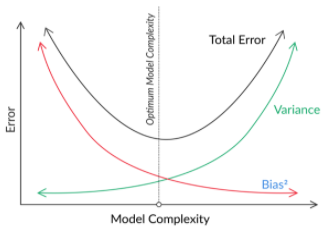

## Cost Function for Ridge Regression
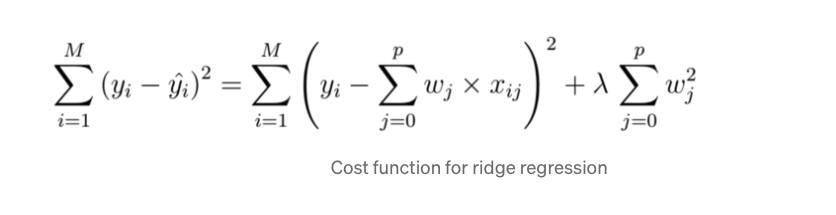

<br>
<br>


## Cost Function for Lasso Regression
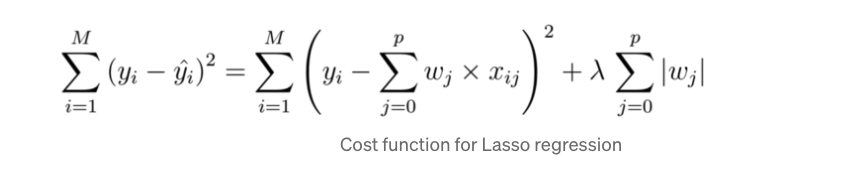

<br><br>
## Finding out the best value of alpha using GridSearchCV
<br>
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters
<br><br>
<b> NOTE FOR NEG_MEAN_ABSLUTE_ERROR </b> <br>
As its name implies, negative MAE is simply the negative of the MAE, which (MAE) is by definition a positive quantity. And since MAE is an error metric, i.e. the lower the better, negative MAE is the opposite: For example, a value of -2.6 is better than a value of -3.0

In [985]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def construct_ML_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_
  cv_results = pd.DataFrame(model_cv.cv_results_)

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred, cv_results

<br><br><br>
## Ridge Regression - Hyperparameter tuning

In [986]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted, ridge_cv_results = construct_ML_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 10.000000
ridge  Regression with  10.0
R2 score (train) :  0.9166751151617185
R2 score (test) :  0.8704201226046137
RMSE (train) :  0.11304414693007461
RMSE (test) :  0.15390088041290248


**Comment:** Ridge Regression model was able to achieve R2 score of 0.87 on test data i.e. 87% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.153 on test data, that means the prediction made by the model can off by 0.153 unit.

<br><br><br>
## Exploring results of ridge_model.cv_results

In [987]:
ridge_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.007121      0.001916         0.004629        0.002072      0.0001   
1        0.006001      0.001792         0.003404        0.000810       0.001   
2        0.004094      0.001083         0.002396        0.000260        0.01   
3        0.004009      0.000297         0.002625        0.000120         0.1   
4        0.003545      0.000184         0.002384        0.000126         0.2   
5        0.003800      0.000171         0.002395        0.000108         0.3   
6        0.004214      0.001122         0.002426        0.000180         0.4   
7        0.003649      0.000214         0.002327        0.000073         0.5   
8        0.003831      0.000229         0.002351        0.000058         0.6   
9        0.003718      0.000204         0.002545        0.000189         0.7   
10       0.003856      0.000226         0.002437        0.000090         0.8   
11       0.004025      0.000845         0.002391        0.000158         0.9   
12       0.003737      0.000098         0.002370        0.000042           1   
13       0.003634      0.000142         0.002345        0.000045           2   
14       0.003600      0.000154         0.002502        0.000243           3   
15       0.003737      0.000181         0.002900        0.000895           4   
16       0.003573      0.000053         0.002446        0.000178           5   
17       0.003777      0.000183         0.002454        0.000113           6   
18       0.003673      0.000306         0.002345        0.000117           7   
19       0.003806      0.000156         0.002672        0.000262           8   
20       0.003562      0.000118         0.002764        0.000698           9   
21       0.005599      0.003315         0.002966        0.000594          10   
22       0.006957      0.001902         0.004432        0.002133          20   
23       0.004879      0.001431         0.003152        0.000712          50   
24       0.003923      0.000661         0.003105        0.000959         100   
25       0.004784      0.000712         0.002694        0.000277         500   
26       0.004337      0.000880         0.003325        0.001409        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.079269          -0.084545   
1    {'alpha': 0.001}          -0.079269          -0.084545   
2     {'alpha': 0.01}          -0.079268          -0.084545   
3      {'alpha': 0.1}          -0.079258          -0.084539   
4      {'alpha': 0.2}          -0.079247          -0.084533   
5      {'alpha': 0.3}          -0.079236          -0.084527   
6      {'alpha': 0.4}          -0.079225          -0.084521   
7      {'alpha': 0.5}          -0.079214          -0.084515   
8      {'alpha': 0.6}          -0.079203          -0.084509   
9      {'alpha': 0.7}          -0.079192          -0.084503   
10     {'alpha': 0.8}          -0.079181          -0.084497   
11     {'alpha': 0.9}          -0.079170          -0.084491   
12     {'alpha': 1.0}          -0.079159          -0.084486   
13     {'alpha': 2.0}          -0.079052          -0.084442   
14     {'alpha': 3.0}          -0.078950          -0.084405   
15     {'alpha': 4.0}          -0.078856          -0.084370   
16     {'alpha': 5.0}          -0.078777          -0.084349   
17     {'alpha': 6.0}          -0.078704          -0.084333   
18     {'alpha': 7.0}          -0.078637          -0.084318   
19     {'alpha': 8.0}          -0.078573          -0.084304   
20     {'alpha': 9.0}          -0.078511          -0.084293   
21    {'alpha': 10.0}          -0.078450          -0.084283   
22      {'alpha': 20}          -0.078026          -0.084246   
23      {'alpha': 50}          -0.077523          -0.084395   
24     {'alpha': 100}          -0.078059          -0.085131   
25     {'alpha': 500}          -0.087590          -0.094165   
26    {'alpha': 1000}          -0.098646          -0.104690   

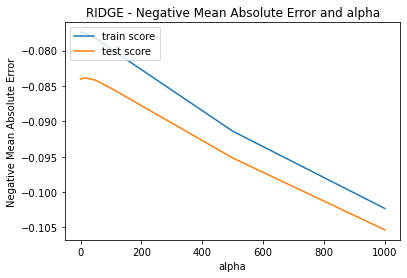

In [988]:
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("RIDGE - Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<font color='blue'> As its name implies, negative MAE is simply the negative of the MAE, which (MAE) is by definition a positive quantity. And since MAE is an error metric, i.e. the lower the better, negative MAE is the opposite.<br>
The tuning parameter alpha helps us determine how much we wish to regularize the model. The higher the value of lambda, the lower the value of the model coefficients, and more is the regularization. <br>
Choosing the right lambda is crucial so as to reduce only the variance in the model, without compromising much on identifying the underlying patterns, i.e., the bias.  </font>


<br><br><br>
## Lasso Regression - Hyperparameter tuning

In [989]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted, lasso_cv_results = construct_ML_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9157339730212566
R2 score (test) :  0.8745163217343286
RMSE (train) :  0.1136807627429514
RMSE (test) :  0.15144883684391255


**Comment:** Lasso Regression model was able to achieve R2 score of 0.87 on test data i.e. 87% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.151 on test data, that means the prediction made by the model can off by 0.151 unit.

<br><br><br>
## Exploring results of lasso_model.cv_results

In [990]:
lasso_cv_results = lasso_cv_results.head(5)

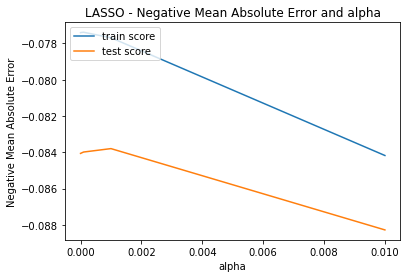

In [991]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("LASSO - Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<font color='blue'> As its name implies, negative MAE is simply the negative of the MAE, which (MAE) is by definition a positive quantity. And since MAE is an error metric, i.e. the lower the better, negative MAE is the opposite.<br>
The tuning parameter alpha helps us determine how much we wish to regularize the model. The higher the value of lambda, the lower the value of the model coefficients, and more is the regularization. <br>
Choosing the right lambda is crucial so as to reduce only the variance in the model, without compromising much on identifying the underlying patterns, i.e., the bias.  </font>


<br><br><br>
## Comparing Model Coefficients - RIDGE vs LASSO

In [992]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=10.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=10.0)  Lasso (alpha=0.001)
LotFrontage                          0.007800             0.005624
LotArea                              0.030600             0.031021
LandSlope                            0.009797             0.009664
OverallQual                          0.078235             0.080717
OverallCond                          0.048387             0.049037
YearBuilt                           -0.040842            -0.041477
BsmtQual                             0.022767             0.023370
BsmtExposure                         0.009889             0.009376
BsmtFinSF1                           0.025977             0.026318
HeatingQC                            0.014794             0.014940
CentralAir                           0.011926             0.010310
1stFlrSF                             0.125737             0.126662
2ndFlrSF                             0.106067             0.105968
BsmtFullBath                         0.018309             0.016930
HalfBath                             0.007532             0.006656
KitchenQual                          0.014826             0.014684
Functional                          -0.026196            -0.025267
Fireplaces                           0.021436             0.021161
GarageFinish                         0.011738             0.010284
GarageArea                           0.020937             0.021494
GarageQual                           0.015475             0.006407
OpenPorchSF                          0.008934             0.007928
MSZoning_RL                          0.027728             0.026250
Street_Pave                          0.009121             0.008553
LotConfig_CulDSac                    0.008891             0.007908
Neighborhood_Edwards                -0.015200            -0.013074
Neighborhood_NAmes                  -0.009540            -0.006864
Neighborhood_NridgHt                 0.015024             0.013960
Neighborhood_Somerst                 0.022859             0.022008
Condition1_Feedr                     0.011705             0.009474
Condition1_Norm                      0.025519             0.023238
Condition2_Norm                      0.008702             0.008009
RoofStyle_Gable                     -0.022221            -0.006335
RoofStyle_Hip                       -0.017955            -0.002035
Exterior1st_HdBoard                 -0.019540            -0.009784
Exterior1st_Plywood                 -0.007230            -0.004658
Exterior1st_Wd Sdng                 -0.018363            -0.010931
Exterior2nd_HdBoard                  0.008569             0.000000
Exterior2nd_Wd Sdng                  0.012820             0.004839
MasVnrType_BrkFace                   0.013389            -0.000000
MasVnrType_None                      0.014021             0.000000
MasVnrType_Stone                     0.011333             0.002048
Foundation_PConc                     0.018365             0.019212
Heating_GasA                        -0.008553            -0.006935
GarageType_Attchd                    0.014757             0.008778
GarageType_Detchd                    0.016613             0.009228
GarageType_Not_applicable            0.012381             0.000000
PavedDrive_Y                         0.009950             0.008313
SaleCondition_Normal                 0.029024             0.028205
SaleCondition_Partial                0.034283             0.033529

<br><br>
### Converting the predictions to its original scale (anti log)

In [993]:


test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[294197 224652 137065 118253 148074]


## Building Final Model using Lasso

#### Lasso Regression produced slightly R2 score on test data than Ridge Regression. Hence, choosing Lasso as the final model.

In [994]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

Lasso (alpha=0.001)
1stFlrSF                              0.126662
2ndFlrSF                              0.105968
OverallQual                           0.080717
OverallCond                           0.049037
SaleCondition_Partial                 0.033529
LotArea                               0.031021
SaleCondition_Normal                  0.028205
BsmtFinSF1                            0.026318
MSZoning_RL                           0.026250
BsmtQual                              0.023370
Condition1_Norm                       0.023238
Neighborhood_Somerst                  0.022008
GarageArea                            0.021494
Fireplaces                            0.021161
Foundation_PConc                      0.019212
BsmtFullBath                          0.016930
HeatingQC                             0.014940
KitchenQual                           0.014684
Neighborhood_NridgHt                  0.013960
CentralAir                            0.010310
GarageFinish                          0.010284
LandSlope                             0.009664
Condition1_Feedr                      0.009474
BsmtExposure                          0.009376
GarageType_Detchd                     0.009228
GarageType_Attchd                     0.008778
Street_Pave                           0.008553
PavedDrive_Y                          0.008313
Condition2_Norm                       0.008009
OpenPorchSF                           0.007928
LotConfig_CulDSac                     0.007908
HalfBath                              0.006656
GarageQual                            0.006407
LotFrontage                           0.005624
Exterior2nd_Wd Sdng                   0.004839
MasVnrType_Stone                      0.002048
Exterior2nd_HdBoard                   0.000000
MasVnrType_BrkFace                   -0.000000
MasVnrType_None                       0.000000
GarageType_Not_applicable             0.000000
RoofStyle_Hip                        -0.002035
Exterior1st_Plywood                  -0.004658
RoofStyle_Gable                      -0.006335
Neighborhood_NAmes                   -0.006864
Heating_GasA                         -0.006935
Exterior1st_HdBoard                  -0.009784
Exterior1st_Wd Sdng                  -0.010931
Neighborhood_Edwards                 -0.013074
Functional                           -0.025267
YearBuilt                            -0.041477

In [995]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'LotArea', 'SaleCondition_Normal',
       'BsmtFinSF1', 'MSZoning_RL', 'BsmtQual'],
      dtype='object')

<br><br>
## Variables that are significant in predicting the price of a house :
<br>
Out of 50 features in the final model, top 10 features are : <br><br>
* 1stFlrSF (Positive Relation with target variable) <br>
* 2ndFlrSF (Positive Relation with target variable) <br>
* OverallQual (Positive Relation with target variable) <br>
* OverallCond (Positive Relation with target variable) <br>
* YearBuilt (Negative Relation with target variable) <br>
* SaleCondition_Partial (Positive Relation with target variable) <br>
* LotArea (Positive Relation with target variable) <br>
* SaleCondition_Normal (Positive Relation with target variable) <br>
* BsmtFinSF1 (Positive Relation with target variable) <br>
* MSZoning_RL (Positive Relation with target variable) <br>

<br><br>
## Plotting the top predictors against the target variable & how well they help to describe the price of house :
<br> <b>Summary note : </b> Except from variable 'YearBuilt', all the above mentioned top 10 variables have a positive relation with target variable. <br>
Additonal commentary provided under each respective plot.


<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

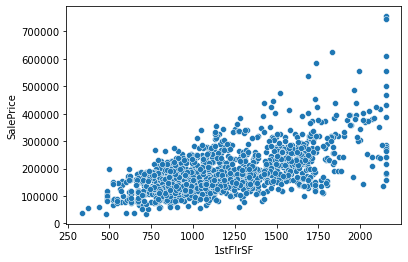

In [996]:
sns.scatterplot(housing_df['1stFlrSF'], housing_df['SalePrice'])

<font color='green'>As we can see in above plot, as the First Floor Square Foot area increases, sale price is also increasing.</font>

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

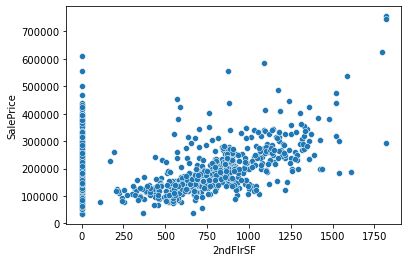

In [997]:
sns.scatterplot(housing_df['2ndFlrSF'], housing_df['SalePrice'])

<font color='green'>As we can see in above plot, as the Second Floor Square Foot area increases, sale price is also increasing.</font>

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

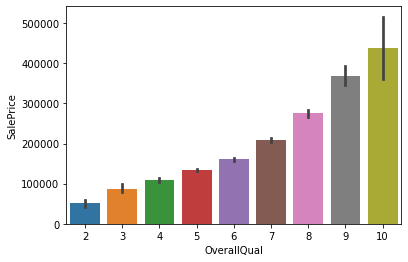

In [998]:
sns.barplot(housing_df['OverallQual'], housing_df['SalePrice'])

<font color='green'>As we can see in above plot, as the overall material and house finish increases/improves, sale price is also increasing.<br> <br>
The convention used in above graph can be mapped to below House finish/overall quality rating as per data dictionary : <br><br>
10     Very Excellent<br> 
9      Excellent<br>
8      Very Good<br>
7      Good<br>
6      Above Average<br>
5      Average<br>
4      Below Average<br>
3      Fair<br>
2      Poor<br>
1      Very Poor<br>
    
</font> 

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

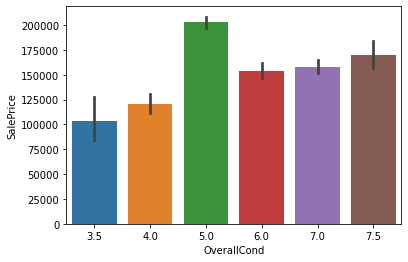

In [999]:
sns.barplot(housing_df['OverallCond'], housing_df['SalePrice'])

<font color='green'> As we can see in above plot, as the overall house condition increases/improves, sale price is also increasing. <br> <br>
The convention used in above graph can be mapped to below overall house condition rating as per data dictionary : <br><br>
10     Very Excellent<br> 
9      Excellent<br>
8      Very Good<br>
7      Good<br>
6      Above Average<br>
5      Average<br>
4      Below Average<br>
3      Fair<br>
2      Poor<br>
1      Very Poor<br>
    
</font> 

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

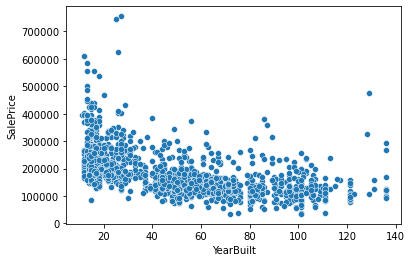

In [1000]:
sns.scatterplot(housing_df['YearBuilt'], housing_df['SalePrice'])

<font color='green'> As we can see in above plot, as YearBuilt variable states the number of years ago the house was built, the lesser value of YearBuilt is better. This means, that newly built/houses built in recent years are expected to fetch higher sale value given the overall house condition/finish of new houses is going to better than old/ancient houses. </font> <br> <br>

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

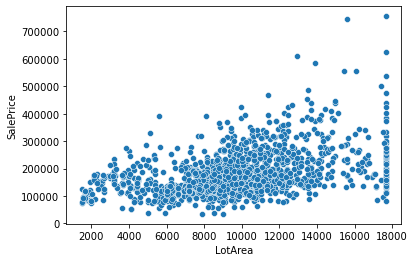

In [1001]:
sns.scatterplot(housing_df['LotArea'], housing_df['SalePrice'])

<font color='green'> As we can see in above plot, as the House lot area increases, the sale price also increases. So houses with high lot area size should fetch high sale values </font> <br> <br>

<AxesSubplot:xlabel='SaleCondition_Partial', ylabel='SalePrice'>

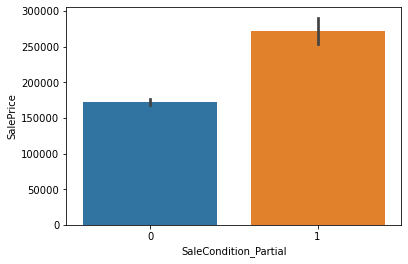

In [1002]:
sns.barplot(housing_df['SaleCondition_Partial'], housing_df['SalePrice'])

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

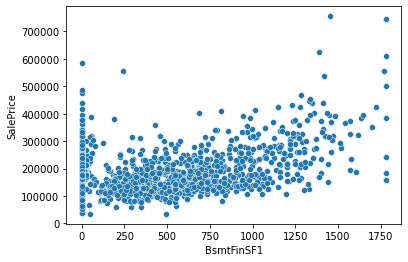

In [1003]:
sns.scatterplot(housing_df['BsmtFinSF1'], housing_df['SalePrice'])

<font color='green'>As we can see from above plot, if the BsmtFinSF1( Type 1 finished square feet) areas is high, then the sale value of the house will also be high</font>

<AxesSubplot:xlabel='MSZoning_RL', ylabel='SalePrice'>

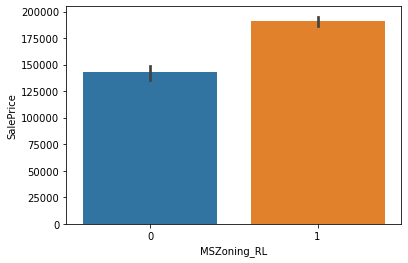

In [1004]:
sns.barplot(housing_df['MSZoning_RL'], housing_df['SalePrice'])

<font color='green'>As we can see from above plot, if the MSZoning has value as RL(Residential Low Density) then it should act linearly with the sale price.</font>

### Summary

- First the housing data is read and analyzed dividing the features into numerical and categorical types.


- SalePrice is the target column here.


- All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is 
observed for change in individual features.


- New features are extracted, redundant features dropped and categorical features are encoded accordingly.


- Then the data in split into train and test data and feature scaling is performed.


- Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.


- Creating dummy variables increased the number of features greatly, hence highly imbalanced columns are dropped.


- Top 50 features are selected through RFE and adjusted R-square. 50 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']


- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
Optimum alpha = 10.0 for ridge and 0.001 for lasso model.


- Model evaluation is done with R2 score and Root Mean Square Error.


- Lasso Regression is chosen as final model for having slightly better R-square value on test data.


- Out of 50 features in the final model, top 5 features are :
1stFlrSF (Positive Relation with target variable)
2ndFlrSF (Positive Relation with target variable)
OverallQual (Positive Relation with target variable)
OverallCond (Positive Relation with target variable)
YearBuilt (Negative Relation with target variable)


- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable. 


- Predicted value of SalePrice is tranformed into its original scale by performing antilog. 



In [1005]:
X_train_rfe.shape, X_test_rfe.shape

((1160, 50), (291, 50))

<br><br><br>
## RIDGE - Scatter plot of the predicted values on the x-axis and the residuals on the y-axis

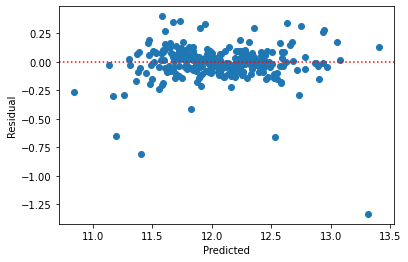

In [1006]:
# Model Building
ri_mo = Ridge(alpha=10.0)
ri_mo.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ri_mo.predict(X_train_rfe)
y_test_pred = ri_mo.predict(X_test_rfe)

res = y_test - y_test_pred
plt.scatter( y_test_pred , res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

## RIDGE - Distribution of errors

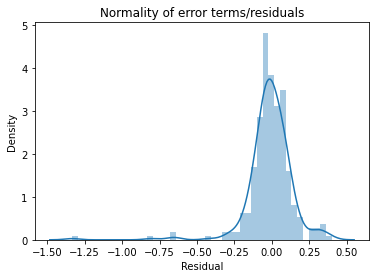

In [1007]:
p = sns.distplot(res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

## LASSO - Scatter plot of the predicted values on the x-axis and the residuals on the y-axis 

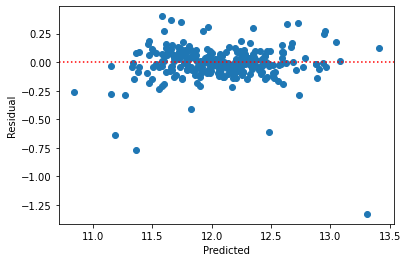

In [1008]:
# Model Building
la_mo = Lasso(alpha=0.001)
la_mo.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = la_mo.predict(X_train_rfe)
y_test_pred = la_mo.predict(X_test_rfe)

res = y_test - y_test_pred
plt.scatter( y_test_pred , res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

## LASSO - Distribution of error terms

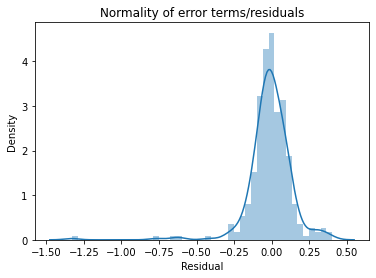

In [1009]:
p = sns.distplot(res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

## Subjective Questions & Answers

### Question 1

<b>What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented? </b>

### Answer
Optimum alpha for Ridge = 10.0  <br>
Optimum alpha for Lasso = 0.001<br>

Training and Test scores for Ridge with alpha = 10.0<br>
R2 score (train) :  0.9166751151617185<br>
R2 score (test) :  0.8704201226046137<br>
RMSE (train) :  0.11304414693007461<br>
RMSE (test) :  0.15390088041290248<br>

---------------------------------------------------------------------------

Training and Test scores for Ridge with alpha = 20.0<br>
R2 score (train) :  0.9165<br>
R2 score (test) :  0.8709<br>
RMSE (train) :  0.1132<br>
RMSE (test) :  0.1536<br>



***************************************************************************


Training and Test scores for Lasso with alpha = 0.001<br>
R2 score (train) :  0.9157339730212566<br>
R2 score (test) :  0.8745163217343286<br>
RMSE (train) :  0.1136807627429514<br>
RMSE (test) :  0.15144883684391255<br>

---------------------------------------------------------------------------

Training and Test scores for Lasso with alpha = 0.002<br>
R2 score (train) :  0.9146<br>
R2 score (test) :  0.8759<br>
RMSE (train) :  0.1144<br>
RMSE (test) :  0.1506<br><br>

As we see, there is not significant change in R2 score and RMSE score for Ridge regression when value of alpha is doubled.<br>
Similarly, there is not significant change in R2 score and RMSE score for Lasso regression when value of alpha is doubled.<br>

<b>The top 5 features are : 1stFlrSF (Positive Relation with target variable) 2ndFlrSF (Positive Relation with target variable) OverallQual (Positive Relation with target variable) OverallCond (Positive Relation with target variable) YearBuilt (Negative Relation with target variable)</b>
<br><br>
The top 5 important variables continue to remain the same for both, Lasso and Ridge regression, even though  we may see a very very small dip in the coefficient value as they move a bit closer to 0.<br>
For example, For Ridge regression with alpha =10, 1stFlrSF values goes from  0.125 to 0.122 for alpha=20.0<br>
Similarly, For Lasso regression with alpha=0.001, 1stFlrSF values goes from 0.126 to 0.124. for alpha=0.002<br>

<b> This explains that as the value of alpha increases, the penalty term will be impacted and coefficeints slowly tend to reach close to zero and model starts to become less complex. if value of alpha becomes too high, then model would infact start underfitting and give a low training score. </b>


In [1010]:

# Model Building
ridge_model = Ridge(alpha=20.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=20.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=20.0
R2 score (train) :  0.9165
R2 score (test) :  0.8709
RMSE (train) :  0.1132
RMSE (test) :  0.1536


In [1011]:
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.9146
R2 score (test) :  0.8759
RMSE (train) :  0.1144
RMSE (test) :  0.1506


In [1012]:
model_coefficients['Ridge (alpha = 20.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=10.0)  Lasso (alpha=0.001)  \
LotFrontage                          0.007800             0.005624   
LotArea                              0.030600             0.031021   
LandSlope                            0.009797             0.009664   
OverallQual                          0.078235             0.080717   
OverallCond                          0.048387             0.049037   
YearBuilt                           -0.040842            -0.041477   
BsmtQual                             0.022767             0.023370   
BsmtExposure                         0.009889             0.009376   
BsmtFinSF1                           0.025977             0.026318   
HeatingQC                            0.014794             0.014940   
CentralAir                           0.011926             0.010310   
1stFlrSF                             0.125737             0.126662   
2ndFlrSF                             0.106067             0.105968   
BsmtFullBath                         0.018309             0.016930   
HalfBath                             0.007532             0.006656   
KitchenQual                          0.014826             0.014684   
Functional                          -0.026196            -0.025267   
Fireplaces                           0.021436             0.021161   
GarageFinish                         0.011738             0.010284   
GarageArea                           0.020937             0.021494   
GarageQual                           0.015475             0.006407   
OpenPorchSF                          0.008934             0.007928   
MSZoning_RL                          0.027728             0.026250   
Street_Pave                          0.009121             0.008553   
LotConfig_CulDSac                    0.008891             0.007908   
Neighborhood_Edwards                -0.015200            -0.013074   
Neighborhood_NAmes                  -0.009540            -0.006864   
Neighborhood_NridgHt                 0.015024             0.013960   
Neighborhood_Somerst                 0.022859             0.022008   
Condition1_Feedr                     0.011705             0.009474   
Condition1_Norm                      0.025519             0.023238   
Condition2_Norm                      0.008702             0.008009   
RoofStyle_Gable                     -0.022221            -0.006335   
RoofStyle_Hip                       -0.017955            -0.002035   
Exterior1st_HdBoard                 -0.019540            -0.009784   
Exterior1st_Plywood                 -0.007230            -0.004658   
Exterior1st_Wd Sdng                 -0.018363            -0.010931   
Exterior2nd_HdBoard                  0.008569             0.000000   
Exterior2nd_Wd Sdng                  0.012820             0.004839   
MasVnrType_BrkFace                   0.013389            -0.000000   
MasVnrType_None                      0.014021             0.000000   
MasVnrType_Stone                     0.011333             0.002048   
Foundation_PConc                     0.018365             0.019212   
Heating_GasA                        -0.008553            -0.006935   
GarageType_Attchd                    0.014757             0.008778   
GarageType_Detchd                    0.016613             0.009228   
GarageType_Not_applicable            0.012381             0.000000   
PavedDrive_Y                         0.009950             0.008313   
SaleCondition_Normal                 0.029024             0.028205   
SaleCondition_Partial                0.034283             0.033529   

                           Ridge (alpha = 20.0)  Lasso (alpha = 0.002)  
LotFrontage                            0.008157               0.004615  
LotArea                                0.030998               0.031297  
LandSlope                              0.009740               0.008895  
OverallQual                            0.078339               0.083190  
OverallCond                            0.047556               0.047834  
YearBuilt         

In [1013]:
model_coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head(4)

Ridge (alpha=10.0)  Lasso (alpha=0.001)  Ridge (alpha = 20.0)  \
1stFlrSF               0.125737             0.126662              0.122502   
2ndFlrSF               0.106067             0.105968              0.103016   
OverallQual            0.078235             0.080717              0.078339   
OverallCond            0.048387             0.049037              0.047556   

             Lasso (alpha = 0.002)  
1stFlrSF                  0.124616  
2ndFlrSF                  0.102877  
OverallQual               0.083190  
OverallCond               0.047834

In [1014]:
model_coefficients.sort_values(by='Ridge (alpha = 20.0)', ascending=False).head(4)

Ridge (alpha=10.0)  Lasso (alpha=0.001)  Ridge (alpha = 20.0)  \
1stFlrSF               0.125737             0.126662              0.122502   
2ndFlrSF               0.106067             0.105968              0.103016   
OverallQual            0.078235             0.080717              0.078339   
OverallCond            0.048387             0.049037              0.047556   

             Lasso (alpha = 0.002)  
1stFlrSF                  0.124616  
2ndFlrSF                  0.102877  
OverallQual               0.083190  
OverallCond               0.047834

### Question 2

<b>You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why? </b>

### Answer
Optimum alpha for Ridge = 10.0  <br>
Optimum alpha for Lasso = 0.001<br><br><br>

Training and Test scores for Ridge with alpha = 10.0<br>
R2 score (train) :  0.9166751151617185<br>
R2 score (test) :  0.8704201226046137<br>
RMSE (train) :  0.11304414693007461<br>
RMSE (test) :  0.15390088041290248<br><br><br>

Training and Test scores for Lasso with alpha = 0.001<br>
R2 score (train) :  0.9157339730212566<br>
R2 score (test) :  0.8745163217343286<br>
RMSE (train) :  0.1136807627429514<br>
RMSE (test) :  0.15144883684391255<br>

Even though the R2 scores and RMSE scores (the evaluation metrics) are similar for both Ridge and Lasso, if we compare them precisely side by side, Lasso provides better R2 score on Test set and a lower RMSE score on Test set, although the difference is not by huge margin compared to Ridge.<br><br>

SO in this particular case, we have opted to go with Lasso regression.

### Question 3

<b> After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now? </b>

### Answer
<b>Before dropping the Top 5 variables, the Top 5 variables are  </b> 1stFlrSF (Positive Relation with target variable) 2ndFlrSF (Positive Relation with target variable) OverallQual (Positive Relation with target variable) OverallCond (Positive Relation with target variable) YearBuilt (Negative Relation with target variable)</b>

<br><br>
<b>After dropping the Top 5 variables, the Top 5 variables are </b> GarageArea, KitchenQual, Fireplaces, LotArea, BsmtQual. All have a positive relation with target variable as the coefficient values are positive.

In [1015]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'YearBuilt'], axis=1)

In [1016]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'YearBuilt'], axis=1)

In [1017]:
alpha = 0.001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [1018]:
lasso_model.coef_

array([ 0.01863706,  0.06080904,  0.00570992,  0.04216284,  0.00799507,
        0.03699888,  0.03120818,  0.02010528, -0.        ,  0.03887738,
        0.06236488, -0.02065214,  0.06086222,  0.01428569,  0.07484103,
        0.        ,  0.02321138,  0.02256109,  0.01959409,  0.01043322,
       -0.02107716, -0.0222155 ,  0.01360233,  0.01788036,  0.        ,
        0.01210415,  0.00415945, -0.02195281,  0.        , -0.02014932,
       -0.00103924, -0.02499817,  0.00454838,  0.02125675,  0.01635029,
       -0.        ,  0.01403271,  0.02827423, -0.01819907,  0.00315015,
       -0.0064887 ,  0.00490023,  0.00991415,  0.02564046,  0.03139158])

In [1019]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(45)

Lasso
GarageArea                 0.074841
KitchenQual                0.062365
Fireplaces                 0.060862
LotArea                    0.060809
BsmtQual                   0.042163
HalfBath                   0.038877
BsmtFinSF1                 0.036999
SaleCondition_Partial      0.031392
HeatingQC                  0.031208
Foundation_PConc           0.028274
SaleCondition_Normal       0.025640
OpenPorchSF                0.023211
MSZoning_RL                0.022561
Exterior2nd_Wd Sdng        0.021257
CentralAir                 0.020105
Street_Pave                0.019594
LotFrontage                0.018637
Neighborhood_Somerst       0.017880
MasVnrType_BrkFace         0.016350
GarageFinish               0.014286
MasVnrType_Stone           0.014033
Neighborhood_NridgHt       0.013602
Condition1_Norm            0.012104
LotConfig_CulDSac          0.010433
PavedDrive_Y               0.009914
BsmtExposure               0.007995
LandSlope                  0.005710
GarageType_Not_applicable  0.004900
Exterior2nd_HdBoard        0.004548
Condition2_Norm            0.004159
GarageType_Attchd          0.003150
BsmtFullBath              -0.000000
MasVnrType_None           -0.000000
GarageQual                 0.000000
RoofStyle_Hip              0.000000
Condition1_Feedr           0.000000
Exterior1st_Plywood       -0.001039
GarageType_Detchd         -0.006489
Heating_GasA              -0.018199
Exterior1st_HdBoard       -0.020149
Functional                -0.020652
Neighborhood_Edwards      -0.021077
RoofStyle_Gable           -0.021953
Neighborhood_NAmes        -0.022216
Exterior1st_Wd Sdng       -0.024998

### Question 4
<b>How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why? </b>

### Answer :
The model should be generalized so that the test accuracy is not lesser than the training score. The model should be accurate for datasets other than the ones which were used during training. <br>
<b> Bias-variance tradeoff - </b> If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data. <br><br>

If a model is too complex, it will have low bias and high variance. But as it has overfitted the training data, model will give high accuracy on training dataset, but is more likely to perform poorly in unseen test dataset. <br><br>

If a model is too simple, it will have high bias and low variance. As it is too simple, it will fail to identify the underlying patterns in the data, and as aresult it will high a low training score as well as test score. <br><br>

If we take the point in the bais variance trade off graph, where both intersect each other, that point will give perfect balance between bias-variance. It will ensure that model does not overfit while still having good variance. <br><br><br>
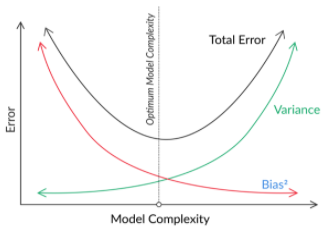